# Modèle SARIMAX

Avant d'entrer dans l'explication du modèle SARIMAX, il est crucial d'expliquer d'abord le modèle ARIMA.

Le modèle ARIMA (AutoRegressive Integrated Moving Average) est une méthode couramment utilisée pour modéliser et prévoir les séries temporelles. Il combine les composantes de l'autorégression (AR) et de la moyenne mobile (MA) avec une différenciation (I) pour prendre en compte les tendances et les comportements saisonniers dans les données.

**1. Composantes du modèle ARIMA**

- **AR (Autorégression)** : L'AR fait référence à la régression linéaire des valeurs actuelles sur les valeurs précédentes de la série temporelle. Il capture les effets de dépendance linéaire à partir des valeurs passées.

- **MA (Moyenne mobile)** : Le MA utilise la moyenne mobile des erreurs précédentes pour modéliser la relation entre les résidus et les observations actuelles de la série temporelle. Il capture les effets de dépendance entre les résidus.

- **I (Différenciation)** : La différenciation est utilisée pour rendre les données stationnaires en supprimant les tendances et les comportements saisonniers. Elle consiste à prendre la différence entre les observations consécutives jusqu'à obtenir une série stationnaire.

**2. Ordres**

Le modèle ARIMA est défini par trois ordres : **p, d et q.**

- **p (Ordre AR)** : L'ordre AR spécifie le nombre de termes autorégressifs à inclure dans le modèle. ***Il indique combien de valeurs passées sont utilisées pour prédire la valeur actuelle***.

- **d (Ordre de différenciation)** : L'ordre de différenciation ***indique combien de fois la série doit être différenciée pour rendre les données stationnaires***.

- **q (Ordre MA)** : L'ordre MA spécifie le nombre de termes de la moyenne mobile à inclure dans le modèle. ***Il indique combien de résidus passés sont utilisés pour prédire l'observation actuelle***.




Contrairement à la Méthode ARIMA qui ne considère pas la Saisonnalité et les variables exogènes, le modèle **SARIMAX** prend en considération ces éléments.

SARIMAX intègre des composantes saisonnières pour modéliser des motifs répétitifs sur des périodes fixe comme, par exemple, chaque mois, chaque trimestre.

**NB** : ***Aussi le modèle SARIMAX est une extension du SARIMA(Saisonnalité), à son tour une extension de ARIMA***

## Méthodologie de Box-Jenkins

La méthodologie de Box-Jenkins est une approche couramment utilisée pour modéliser et prévoir les séries temporelles. Elle comprend les étapes suivantes :

Méthode ARIMA
Dans la méthode ARIMA pour modéliser & prévoir les Séries Temporelles, on utilise la méthodologie Box-Jenkins.

Cette méthodologie comprends trois étapes suivantes :

**1. Identification du modèle** :

- Analyser les données, détecter les tendances ou une saisonnalité;

- Rendre les données stationnaires en appliquant la différenciation;

- Déterminer les ordres p, d et q, à l'aide des graphique ACF (fonction d'autocorrélation) et PACF (fonction autocorrélation partielle)

**2. Estimation du modèle :** MCO(OLS) par exemple pour estimer les paramètres du modèle.

**3. Vérification du modèle**

- Diagnostic du modèle :  vérifier que les résidus du modèle ARIMA sont "bruit blanc" (absence de corrélation significative)

- Ajustement du modèle : si le modèle ne satisfait pas les critères du bruit blanc alors, il faut modifier les valeurs de p, d et q. Puis reprendre les étapes précédentes.

- Validation : effectue des prédictions sur les données de validation en utilisant des métriques comme RMSE(erreur quadratique moyenne) ou AIC (critère d'information AKAIKE)

La méthodologie de Box-Jenkins est itérative, ce qui signifie que les étapes d'identification, d'estimation et de vérification peuvent être répétées plusieurs fois pour améliorer le modèle. L'objectif est de trouver le meilleur modèle ARIMA qui capture les motifs et les caractéristiques importantes de la série temporelle, et qui peut être utilisé pour effectuer des prédictions précises.



### Librairies de base

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

### Exploration du dataset

In [3]:
chemin_fichier="E:\Formation_Data_Analystic\Statistique\sda_stat_AQI\df_final_london.csv"
df_initial=pd.read_csv(chemin_fichier)

In [ ]:
df_initial.head(3)

,Date,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,TEMP_MOY,HUMIDITY_MAX_PERCENT,HUMIDITY_EST_AVG,WINDSPEED_MAX_KMH,WINDSPEED_AVG_KMH,PRECIP_TOTAL_DAY_MM,SUNHOUR,...,CLOUDCOVER_AVG_PERCENT,Toluène,Benzène,CO,NO2,SO2,O3,PM2.5,PM10,AQI
0,2024-01-01,10,7,8.00,77,57.75,22,13.2,0.7,1,...,86.500,1.220990,0.557676,173.625000,16.883333,3.025000,54.750000,5.029167,8.579167,21.411284
1,2024-01-02,12,9,10.75,94,70.50,41,24.6,3.3,1,...,92.125,0.798221,0.362716,147.458333,13.370833,2.262500,63.208333,4.125000,6.500000,25.283333
2,2024-01-03,11,10,10.25,75,56.25,28,16.8,0.3,1,...,96.875,0.961362,0.431034,175.041667,17.875000,2.929167,51.000000,5.612500,7.675000,21.110833


In [5]:
# Créer un nouveau df et recuperer que les colonnes Date et AQI

df = df_initial[['Date','PM2.5', 'AQI']]

In [6]:
df.head(3)

,Date,PM2.5,AQI
0,2024-01-01,5.029167,21.411284
1,2024-01-02,4.125000,25.283333
2,2024-01-03,5.612500,21.110833


In [7]:
df.shape

(366, 3)

## Présentation de la problématique

**Description de la base de données la qualité de l'air (AQI)**

La base de données AQI regroupe les valeurs sur la qualité de l'air de la ville de Londre en 2024. Elle sera l'objet d'une étude en série temporelle pour comprendre la variation de l'AQI en fonction du temps.


La base de données AQI contient les colonnes suivantes :

- **Date** : La date (jour, mois et année) de chaque observation.
- **AQI** : la concentration de l'air.


In [8]:
# Information sur la base de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    366 non-null    object 
 1   PM2.5   366 non-null    float64
 2   AQI     366 non-null    float64
dtypes: float64(2), object(1)
memory usage: 8.7+ KB


In [ ]:
# Conversion de la date en datetime
from datetime import datetime
df['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)

In [10]:
# Verification
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    366 non-null    datetime64[ns]
 1   PM2.5   366 non-null    float64       
 2   AQI     366 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 8.7 KB


In [11]:
# Mettre la date en index de la table
df.set_index('Date',inplace=True)
df.head(3)

,PM2.5,AQI
Date,,
2024-01-01,5.029167,21.411284
2024-01-02,4.125000,25.283333
2024-01-03,5.612500,21.110833


In [ ]:
# Vérification des valeurs manquante
df.isnull().sum()

AQI    0
dtype: int64

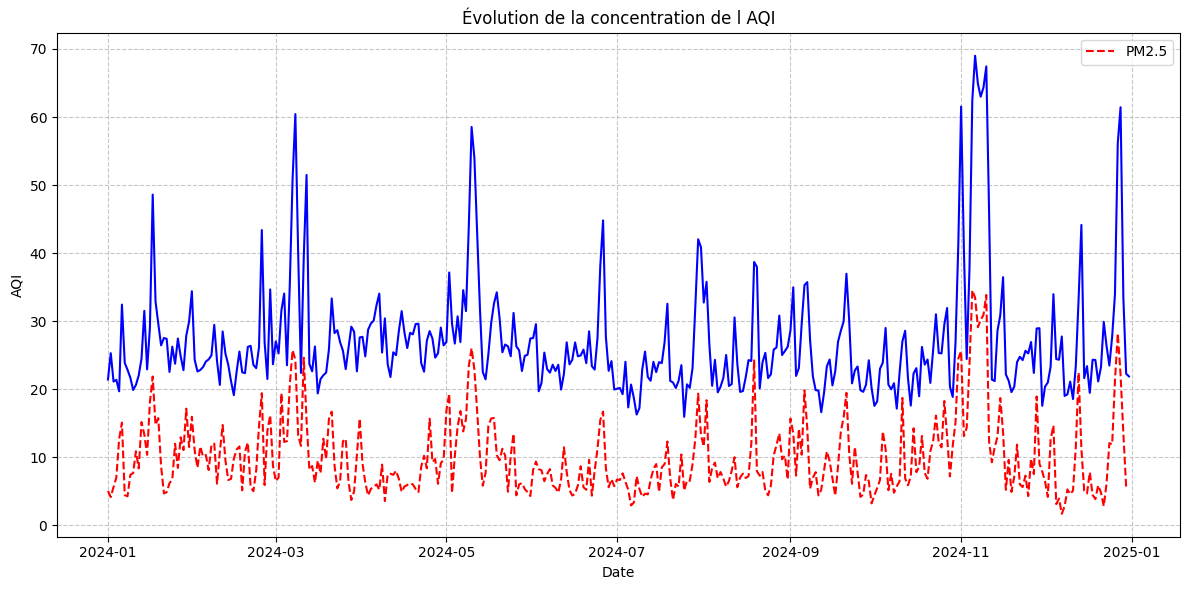

In [ ]:
# Visualisation des séries temporelles AQI et PM2.5
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['AQI'], color='blue', linewidth=1.5)
plt.plot(df['PM2.5'], label='PM2.5', color='red', linewidth=1.5, linestyle='--')
plt.title('Évolution de la concentration de l AQI')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

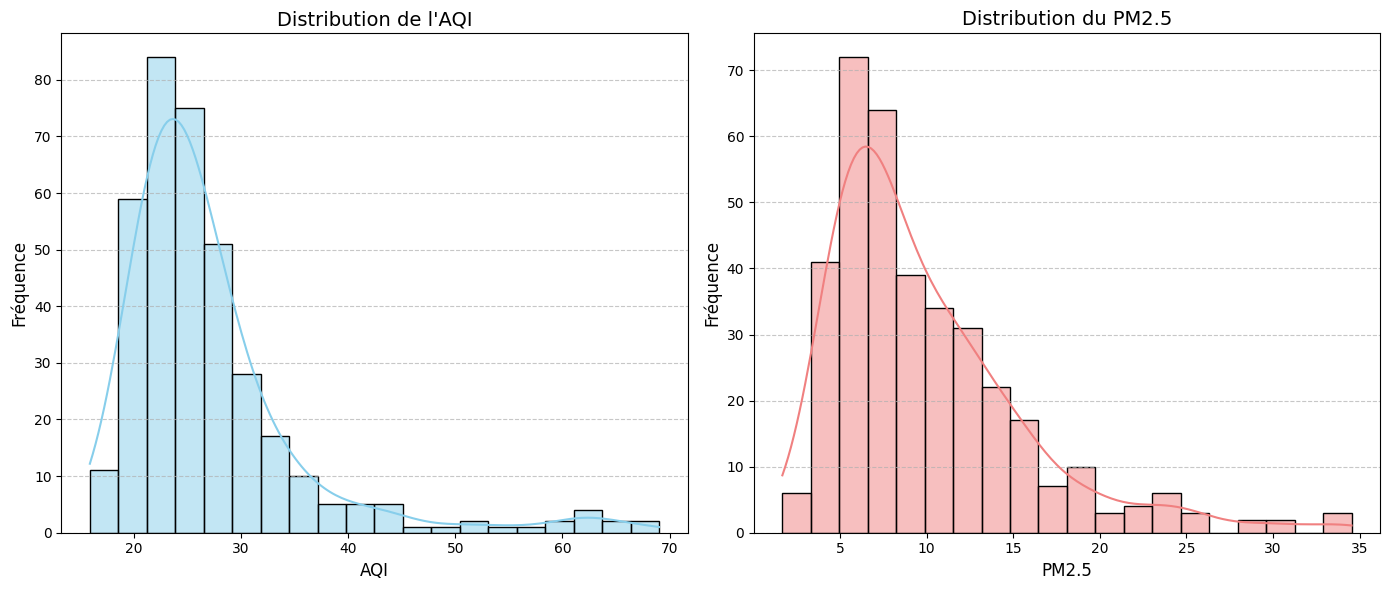

In [25]:


# --- Distribution des valeurs (Histogrammes) ---
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) # 1 ligne, 2 colonnes, premier graphique
sns.histplot(df['AQI'], kde=True, bins=20, color='skyblue')
plt.title('Distribution de l\'AQI', fontsize=14)
plt.xlabel('AQI', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2) # 1 ligne, 2 colonnes, deuxième graphique
sns.histplot(df['PM2.5'], kde=True, bins=20, color='lightcoral')
plt.title('Distribution du PM2.5', fontsize=14)
plt.xlabel('PM2.5', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [26]:
# Statistiques descriptives

print("\nStatistiques descriptives pour l'AQI et le PM2.5 :")
print(df[['AQI', 'PM2.5']].describe())


Statistiques descriptives pour l'AQI et le PM2.5 :
              AQI       PM2.5
count  366.000000  366.000000
mean    27.097212    9.985178
std      8.662264    5.689122
min     15.926389    1.666667
25%     22.232084    5.896875
50%     24.824792    8.239583
75%     28.871615   12.318750
max     69.008472   34.533333


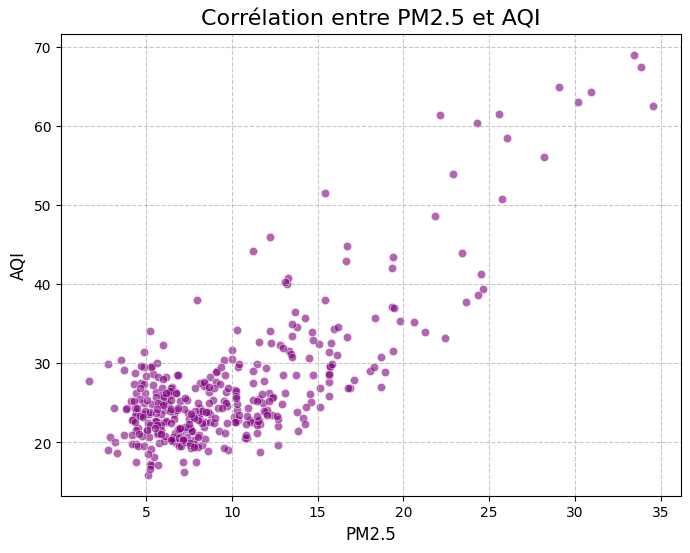


Coefficient de corrélation entre AQI et PM2.5 : 0.783


In [29]:
# Corrélation entre AQI et PM2.5 (Nuage de points et coefficient)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['PM2.5'], y=df['AQI'], alpha=0.6, color='purple')
plt.title('Corrélation entre PM2.5 et AQI', fontsize=16)
plt.xlabel('PM2.5', fontsize=12)
plt.ylabel('AQI', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

correlation = df['AQI'].corr(df['PM2.5'])
print(f"\nCoefficient de corrélation entre AQI et PM2.5 : {correlation:.3f}")

On constate une relation linéaire entre PM2.5 et AQI. Lorsque PM2.5 augmente, l'AQI a tendance à augmenter. De plus, il y 'a une forte corrélation positive, qui entraine que ces deux variables évoluent dans la même direction.

## Méthodologie Jenkins Box

### Etape 1 : Identification du modèle

#### a) Analyse des données :  

On décompose la série temporelle dans le but d'identifier les trois composantes : 
- La Tendance,
- La Saisonnalité
- Les Résidus

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

**Modèle additif**

**Additif** : Si l'amplitude de la saisonnalité ne change pas avec le niveau de la série. La somme de la Tendance (T), Saisonnalité (S) et Résidus (R)


In [68]:
# Period = 4, par trismestre
# Period = 24, par heure
# periode = 12, par mois
# Periode = 7, par semaine
decomposition_aqi = seasonal_decompose(df['AQI'], model='additive', period=24)

In [69]:
trend = decomposition_aqi.trend
seasonal = decomposition_aqi.seasonal
residual = decomposition_aqi.resid

##### AQI

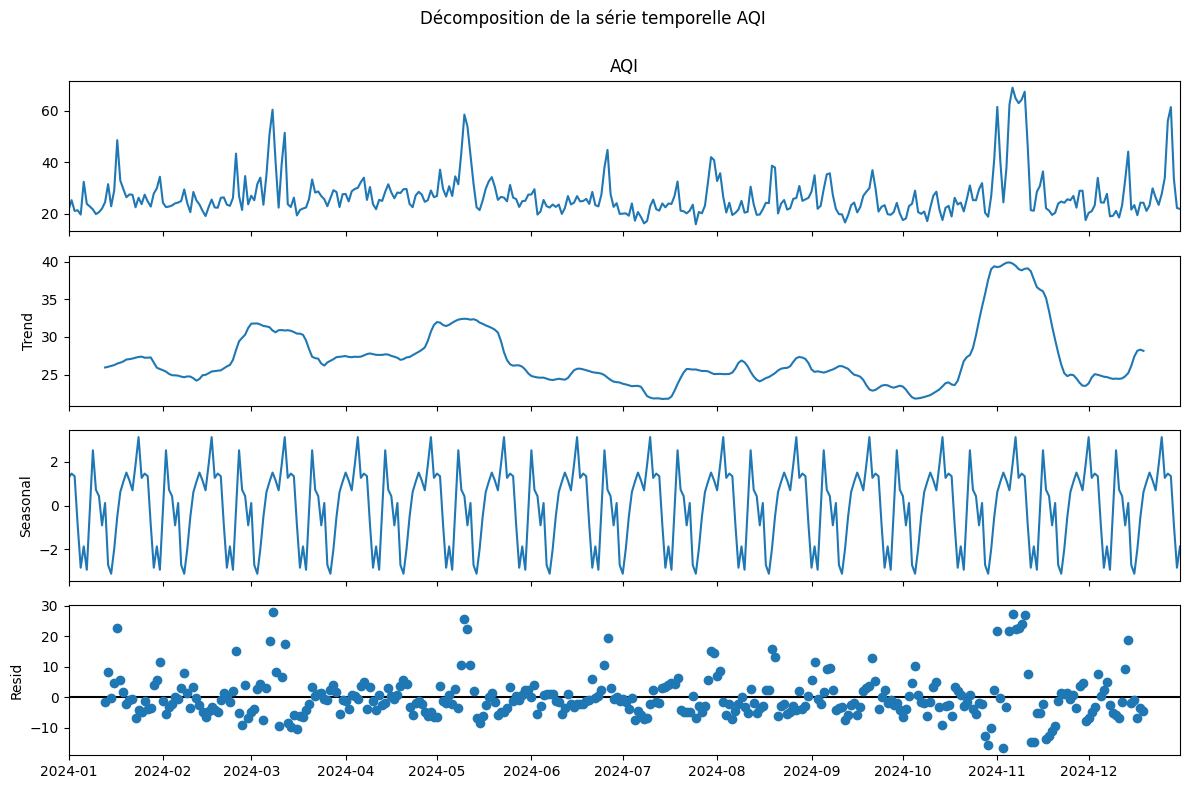

In [71]:
# Visualisation de la décomposition
fig = decomposition_aqi.plot()
fig.set_size_inches(12, 8)
fig.suptitle('Décomposition de la série temporelle AQI ') 
plt.tight_layout(rect=[0, 0, 1, 0.98]) 
plt.show()

##### PM2.5

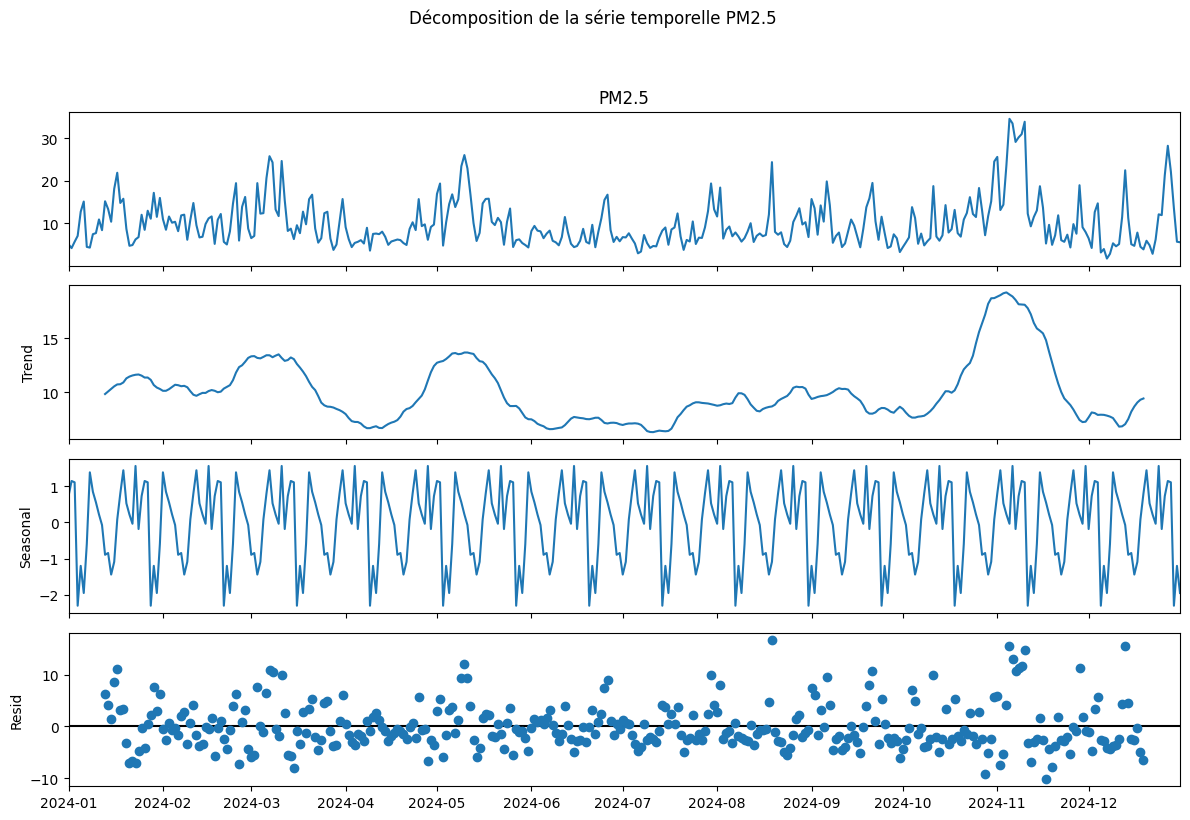

In [33]:
decomposition_pm25 = seasonal_decompose(df['PM2.5'], model='additive', period=24)
fig_pm25 = decomposition_pm25.plot()
fig_pm25.set_size_inches(12, 8)
fig_pm25.suptitle('Décomposition de la série temporelle PM2.5 ', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

Conclusion: On constate la série AQI présente une tendance et une saisonnalité

#### b) Test Stationnarité (Différenciation)

Le but est de rendre la série stationnaire c'est à dire supprimer les tendances et la saisonnalité.

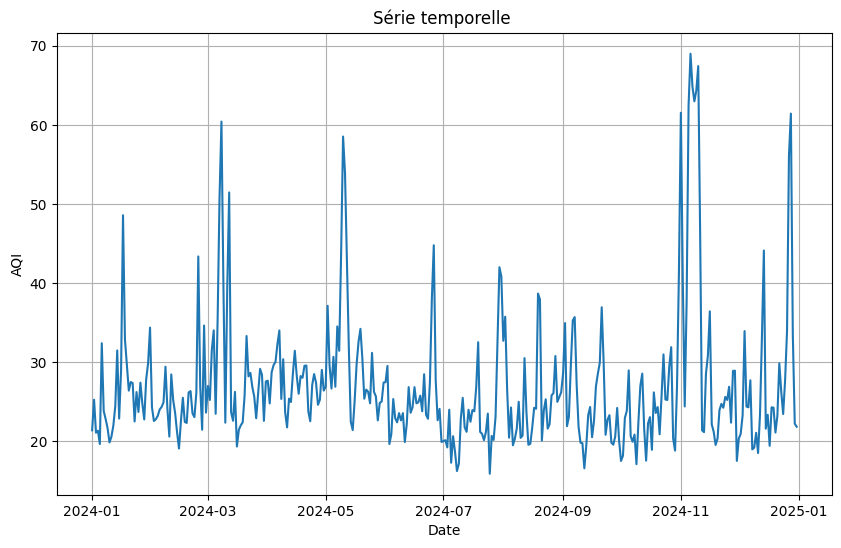

In [97]:

# Afficher la série temporelle
plt.figure(figsize=(10, 6))
plt.plot(df['AQI'])
plt.title('Série temporelle ')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(True)
plt.show()

Le graphique présente nous montre que la série n'est pas stationnaire car la moyenne n'est constante.

Pour la rendre la rendre stationnaire, nous allons utiliser la fonction **diff**.
Cette méthode est utilisée pour calculer la différence entre un élément et un élément dans la période précédente (ou une période spécifique)

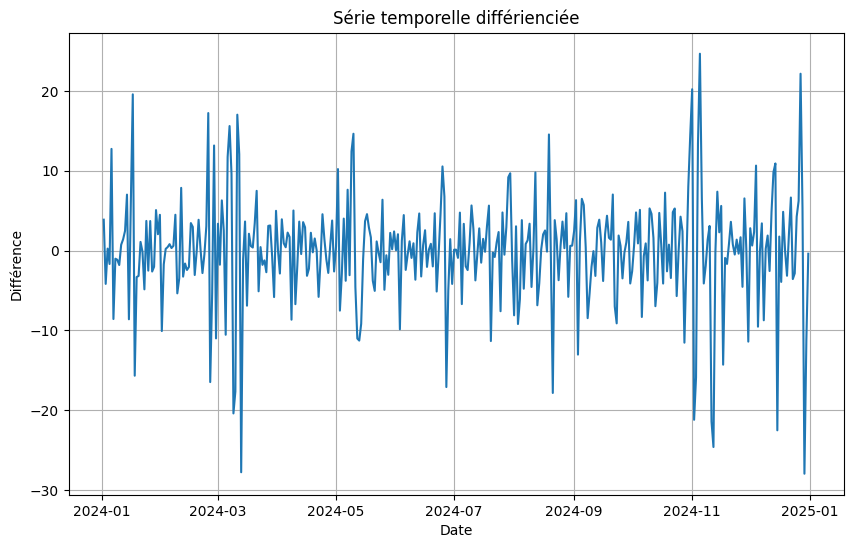

In [ ]:

# Différenciation pour rendre la série stationnaire
differenced = df['AQI'].diff().dropna()

# Afficher la série différienciée
plt.figure(figsize=(10, 6))
plt.plot(differenced)
plt.title('Série temporelle différienciée')
plt.xlabel('Date')
plt.ylabel('AQI Différencier')
plt.grid(True)
plt.show()

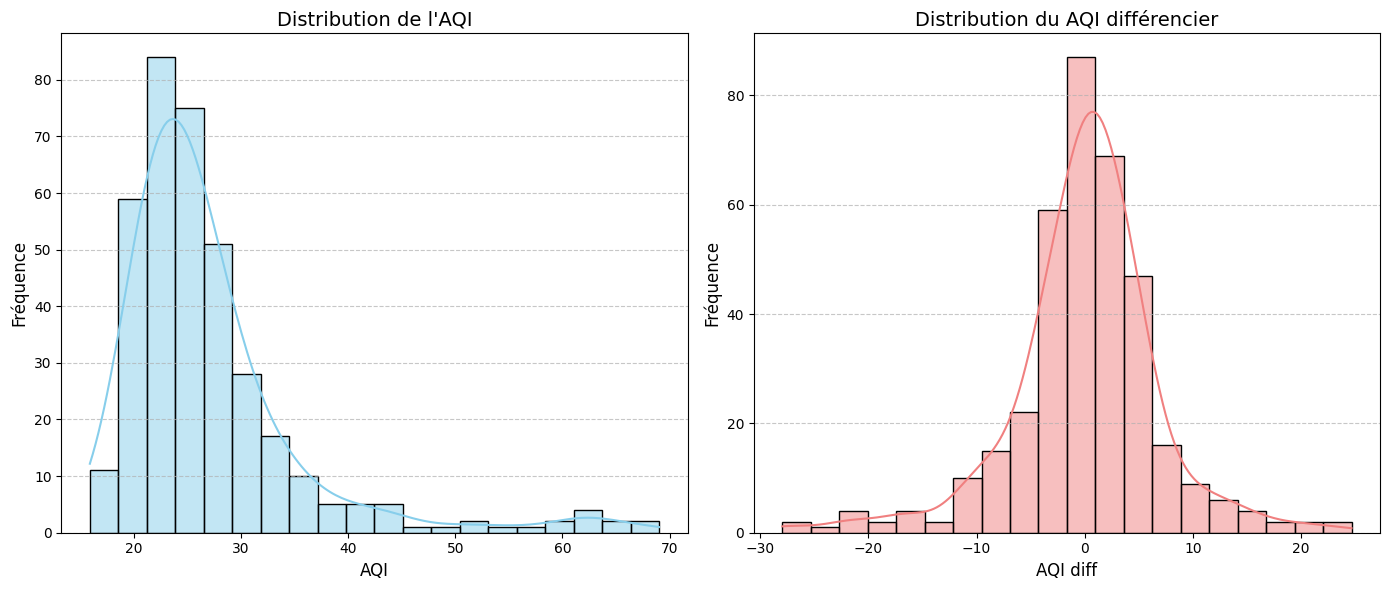

In [98]:
# --- Distribution des valeurs (Histogrammes) ---
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) # 1 ligne, 2 colonnes, premier graphique
sns.histplot(df['AQI'], kde=True, bins=20, color='skyblue')
plt.title('Distribution de l\'AQI', fontsize=14)
plt.xlabel('AQI', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2) # 1 ligne, 2 colonnes, deuxième graphique
sns.histplot(differenced, kde=True, bins=20, color='lightcoral')
plt.title('Distribution du AQI différencier', fontsize=14)
plt.xlabel('AQI diff', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [100]:
differenced.describe()

count    365.000000
mean       0.001248
std        6.831562
min      -27.960137
25%       -2.932984
50%        0.434723
75%        3.447084
max       24.669099
Name: AQI, dtype: float64

**Observation** :  graphiquement, la série est stationnaire car la moyenne est constante autour de 0. Pour confirmer, nous allon tester utiliser le **test de AD-Fuller**

Hypothèse nulle est (H0) :  La série n'est pas stationnaire. Si p-value < 0.5 (seuil de base) alors **H0 est rejeté**

In [81]:
from statsmodels.tsa.stattools import adfuller

print("Résultats du Test de Dickey-Fuller Augmenté pour AQI")
adf_aqi = adfuller(differenced)

# Affichage des résultats
print(f'Statistique ADF: {adf_aqi[0]: .4f}')
print(f'P-value : {adf_aqi[1]: .4f}')

print('Valeurs critiques : ')
for key, value in adf_aqi[4].items():
    print(f' {key} : {value: .4f}')


# Interprétation de p-value
if adf_aqi[1] <=0.05:
    print("\nConclusion : La P-value est <= 0.05. Nous rejetons l'hypothèse nulle (H0).")
    print("La série AQI est probablement stationnaire")
else:
    print("\nConclusion : La P-value est > 0.05. Nous ne pouvons pas rejeter l'hypothèse nulle (H0).")
    print("La série AQI n'est probablement PAS stationnaire.")


Résultats du Test de Dickey-Fuller Augmenté pour AQI
Statistique ADF: -10.9717
P-value :  0.0000
Valeurs critiques : 
 1% : -3.4487
 5% : -2.8696
 10% : -2.5711

Conclusion : La P-value est <= 0.05. Nous rejetons l'hypothèse nulle (H0).
La série AQI est probablement stationnaire


### c) Identification des ordres :  p, d et q

Nous allons réaliser les fonctions Autocorrélation (ACF) et Autocorrélation partielle (PACF)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

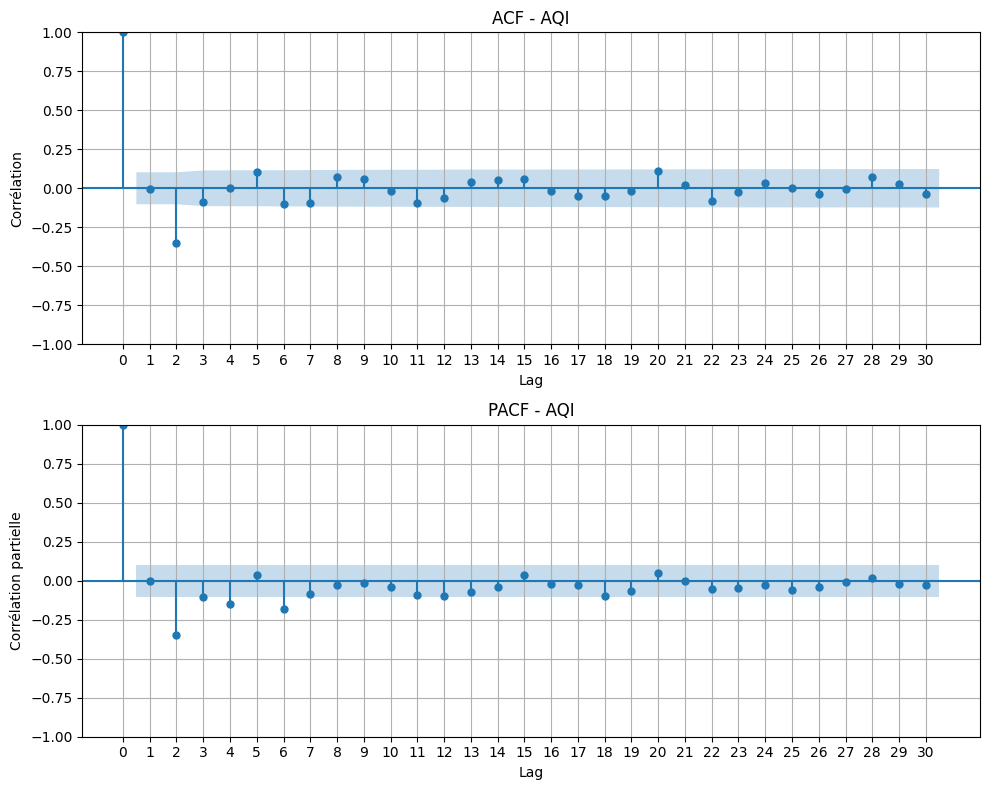

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Tracer l'ACF
plot_acf(differenced, lags=30, zero=True, ax=ax1)
ax1.set_title('ACF - AQI')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Corrélation')
ax1.grid(True)

# Ajuster les graduations sur l'axe x pour l'ACF
ax1.set_xticks(np.arange(0, 31, 1))

# Tracer le PACF
plot_pacf(differenced, lags=30, zero=True, ax=ax2)
ax2.set_title('PACF - AQI')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Corrélation partielle')
ax2.grid(True)

# Ajuster les graduations sur l'axe x pour le PACF
ax2.set_xticks(np.arange(0, 31, 1))

# Ajuster les subplots
plt.tight_layout()

# Afficher le graphique
plt.show()

## Etape 2: Estimation du modèle

In [64]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox

In [ ]:
p = 1
d = 1
q = 1
s = 4 # trimestre 

In [89]:
# Sélectionner la série originale et la variable exogène
train_data = df['AQI']
exog_data = df['PM2.5']

# Split des données en entraînement et test (par exemple, 80% entraînement, 20% test)
train_size = int(len(df) * 0.8)
train_aqi = train_data.iloc[:train_size]
test_aqi = train_data.iloc[train_size:]
train_exog = exog_data.iloc[:train_size]
test_exog = exog_data.iloc[train_size:]

In [87]:
# Diviser df en df_train et df_test

size_train = int(len(df) * 0.8)
df_train = df['AQI'][:size_train]
df_test = df['AQI'][size_train:]


Tentative d'ajustement du modèle SARIMA(1, 1, 1)(1, 1, 1, 24) pour l'AQI...


e:\Formation_Data_Analystic\Statistique\sda_stat_AQI\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
e:\Formation_Data_Analystic\Statistique\sda_stat_AQI\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)



Résumé du modèle SARIMA pour l'AQI :
                                     SARIMAX Results                                      
Dep. Variable:                                AQI   No. Observations:                  292
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood                -723.995
Date:                            Mon, 14 Jul 2025   AIC                           1459.990
Time:                                    00:32:35   BIC                           1480.898
Sample:                                01-01-2024   HQIC                          1468.413
                                     - 10-18-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
PM2.5          0.8101      0.058     13.977      0.000       0.696       0.9

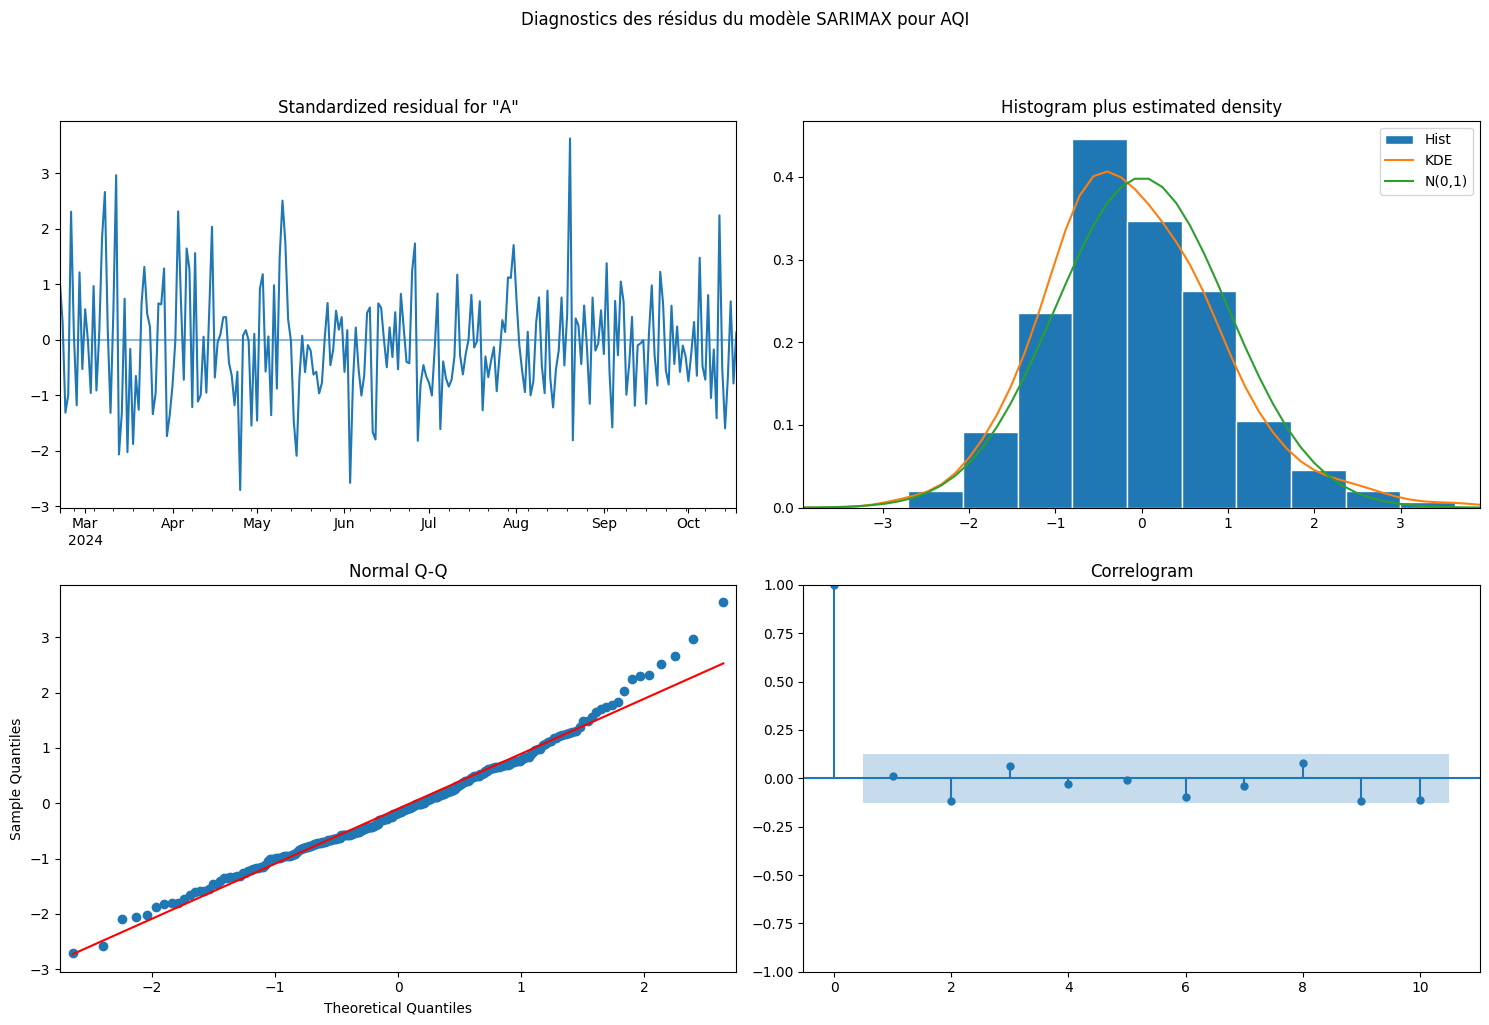


Test de Ljung-Box sur les résidus (Hypothèse Nulle : les résidus sont indépendants) :
      lb_stat  lb_pvalue
10  19.537343   0.033945
20  38.521429   0.007642
30  60.669042   0.000763


In [ ]:
# Modèle SARIMA pour AQI

order = (p, d, q)
seasonal_order = (p, d, q, s)
print(f"\nTentative d'ajustement du modèle SARIMA{order}{seasonal_order} pour l'AQI...")
try:
    model_aqi = SARIMAX(train_aqi,
                        exog = train_exog,
                        order=order,
                        seasonal_order=seasonal_order,
                        enforce_stationarity=False, 
                        enforce_invertibility=False)
    results_aqi = model_aqi.fit(disp=False) # disp=False pour éviter l'affichage de chaque itération

    print("\nRésumé du modèle SARIMA pour l'AQI :")
    print(results_aqi.summary())

    # --- 6.2 Analyse des résidus du modèle ---
    print("\nAnalyse des résidus :")
    results_aqi.plot_diagnostics(figsize=(15, 10))
    plt.suptitle('Diagnostics des résidus du modèle SARIMAX pour AQI', y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

    # Test de Ljung-Box sur les résidus pour l'autocorrélation
    print("\nTest de Ljung-Box sur les résidus (Hypothèse Nulle : les résidus sont indépendants) :")
    ljung_box = acorr_ljungbox(results_aqi.resid, lags=[10, 20, 30], return_df=True)
    print(ljung_box)

except Exception as e:
    print(f"Une erreur est survenue lors de l'ajustement du modèle : {e}")
    print("Cela peut arriver si les ordres ne sont pas optimaux ou si les données sont trop courtes pour une période saisonnière.")
    print("Essayez de revoir les ordres ou d'augmenter la taille des données si possible.")



### Vérification du modèle

Cette étape consiste à vérifier si il y'a la présence du **Bruit Blanc**

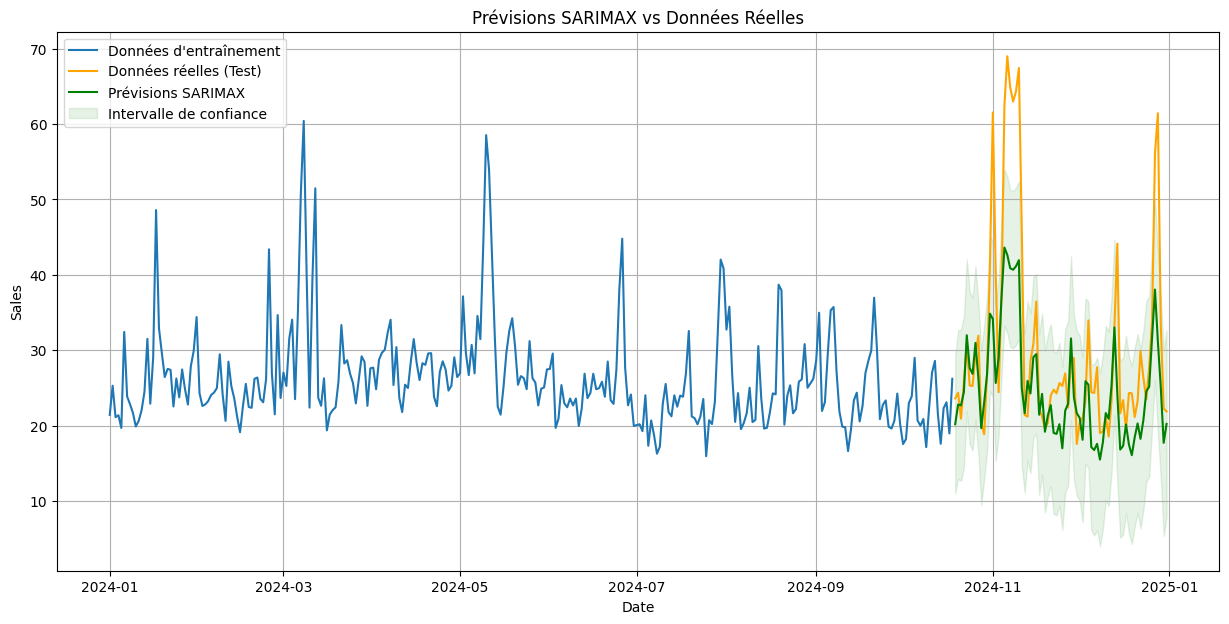

In [91]:
forecast_start_index = test_aqi.index[0]
forecast_end_index = test_aqi.index[-1]

forecast_results = results_aqi.get_prediction(start=forecast_start_index,
                                           end=forecast_end_index,
                                           exog=test_exog, # Indispensable pour la prévision avec exogènes
                                           dynamic=False) # dynamic=False pour les prévisions en une étape (one-step ahead)

forecast_mean = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()

plt.figure(figsize=(15, 7))
plt.plot(train_aqi.index, train_aqi, label='Données d\'entraînement')
plt.plot(test_aqi.index, test_aqi, label='Données réelles (Test)', color='orange')
plt.plot(forecast_mean.index, forecast_mean, label='Prévisions SARIMAX', color='green')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='green', alpha=0.1, label='Intervalle de confiance')
plt.title('Prévisions SARIMAX vs Données Réelles')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [92]:
# Calcul des métriques d'évaluation sur la période de test
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse = np.sqrt(mean_squared_error(test_aqi, forecast_mean))
mae = mean_absolute_error(test_aqi, forecast_mean)
print(f"\nRMSE sur la période de test: {rmse:.2f}")
print(f"MAE sur la période de test: {mae:.2f}")


RMSE sur la période de test: 10.16
MAE sur la période de test: 6.69



Prévision future au-delà des données existantes...


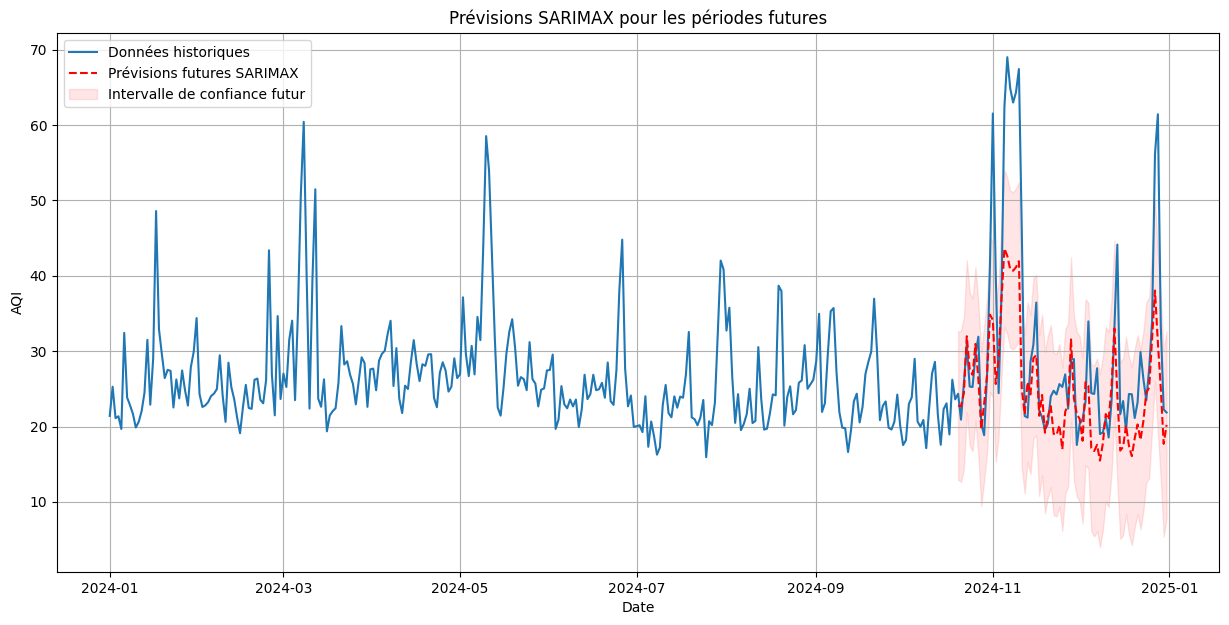

In [96]:
# --- Prévision future (au-delà des données existantes) ---
print("\nPrévision future au-delà des données existantes...")
# Pour cela, il faut définir les dates futures et les valeurs futures de la variable exogène.
future_periods = 12 # Prévoir pour les 7 prochains jours
# future_dates = test_exog.indexpd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=future_periods, freq='MS')

# future_exog = 5 * np.random.rand(future_periods) + np.linspace(10, 15, future_periods) # simulation simple

future_forecast_results = results_aqi.get_prediction(start=test_exog.index[1],
                                                 end=test_exog.index[-1],
                                                 exog=test_exog) # Utiliser les exogènes futures

future_forecast_mean = future_forecast_results.predicted_mean
future_conf_int = future_forecast_results.conf_int()

plt.figure(figsize=(15, 7))
plt.plot(df['AQI'].index, df['AQI'], label='Données historiques')
plt.plot(future_forecast_mean.index, future_forecast_mean, label='Prévisions futures SARIMAX', color='red', linestyle='--')
plt.fill_between(future_conf_int.index, future_conf_int.iloc[:, 0], future_conf_int.iloc[:, 1], color='red', alpha=0.1, label='Intervalle de confiance futur')
plt.title('Prévisions SARIMAX pour les périodes futures')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()